# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D, LSTM, Embedding
from keras.callbacks import EarlyStopping
%matplotlib inline

# Reading the dataset

In [2]:
data = pd.read_csv('train_E6oV3lV.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# data = data[['Sentiment', 'Text']]

In [4]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.info()
data.drop('id', axis = 'columns', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
# data['Sentiment'].replace(4, 1, inplace=True)

In [8]:
# data['Sentiment'].value_counts()

In [9]:
sentiment = data['label']

In [10]:
tweets = data['tweet']

# EDA

<Axes: xlabel='label'>

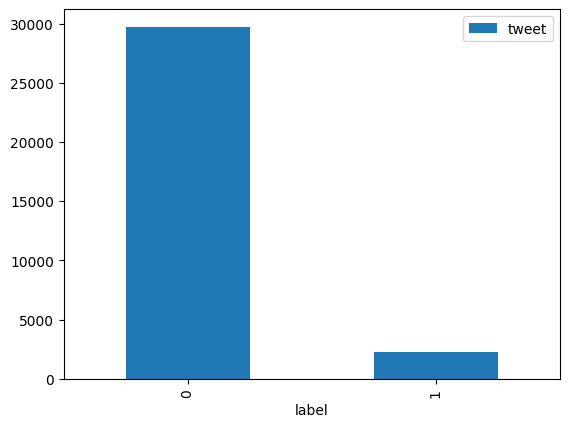

In [11]:
data.groupby('label').count().plot(kind = 'bar')

# Preprocessing

In [12]:
newTweets = []

urlPattern = r"http\S+|http\S+| www\S+"
userPattern = r"@\S+"
emojiPattern = r":\S+|;\S+"
alphaPattern = r"[^A-Za-z0-9]+"
stopwords = nltk.corpus.stopwords.words('english')

def cleanText(tweet):
    tweet = str(tweet)
    tweet = re.sub(urlPattern, 'URL', tweet)
    tweet = re.sub(userPattern, 'USER', tweet)
    tweet = re.sub(alphaPattern, ' ', tweet)
    tweet = re.sub(emojiPattern, 'EMOJI', tweet)
    
    newTweet = ''
    token = word_tokenize(tweet)
    for word in token:
        if len(word) > 1:
            newTweet += str.lower(word) + ' '
    newTweets.append(newTweet)

In [13]:
for i in tweets:
    if type(i) != str:
        print(type(i))

In [14]:
tweets.apply(cleanText)

0        None
1        None
2        None
3        None
4        None
         ... 
31957    None
31958    None
31959    None
31960    None
31961    None
Name: tweet, Length: 31962, dtype: object

In [15]:
newTweets

['user when father is dysfunctional and is so selfish he drags his kids into his dysfunction run ',
 'user user thanks for lyft credit can use cause they don offer wheelchair vans in pdx disapointed getthanked ',
 'bihday your majesty ',
 'model love take with all the time in ur ',
 'factsguide society now motivation ',
 'huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo ',
 'user camping tomorrow user user user user user user user danny ',
 'the next school year is the year for exams can think about that school exams hate imagine actorslife revolutionschool girl ',
 'we won love the land allin cavs champions cleveland clevelandcavaliers ',
 'user user welcome here it so gr8 ',
 'ireland consumer price index mom climbed from previous to in may blog silver gold forex ',
 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ',
 'get to see my daddy today 80days gett

# Modelling

In [16]:
max_words = 10000
max_length = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_words, filters = string.punctuation, lower=True)
tokenizer.fit_on_texts(newTweets)

In [17]:
# print(tokenizer)

In [18]:
print(len(tokenizer.word_counts))

39072


In [19]:
x = tokenizer.texts_to_sequences(newTweets)
# x.shape
# x

In [20]:
x = pad_sequences(x, maxlen=max_length)
print(x.shape)

(31962, 200)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, sentiment, test_size=0.2, random_state=42)

In [22]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(200))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs = 10, batch_size=64, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
174/360 [=============>................] - ETA: 1:27 - loss: 0.2258 - accuracy: 0.0701


KeyboardInterrupt



In [ ]:
print(model.evaluate(x_test, y_test)[1])